# **Objective:**
To analyze historical GDP per capita data for the United States and forecast future economic growth trends using time series analysis techniques.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 2- gdp-per-capita-maddison.csv to 2- gdp-per-capita-maddison.csv


In [ ]:
import pandas as pd

## **Data Exploration.**

In [ ]:
import pandas as pd

# Load the dataset
gdp_data = pd.read_csv('2- gdp-per-capita-maddison.csv')

# Display the first few rows of the dataset to understand its structure
gdp_data.head()


,Entity,Code,Year,GDP per capita,417485-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


**Dataset contains columns for:**

Entity: The country or region.
Code: The country code.
Year: The year of the data.
GDP per capita: The GDP per capita value for that year.

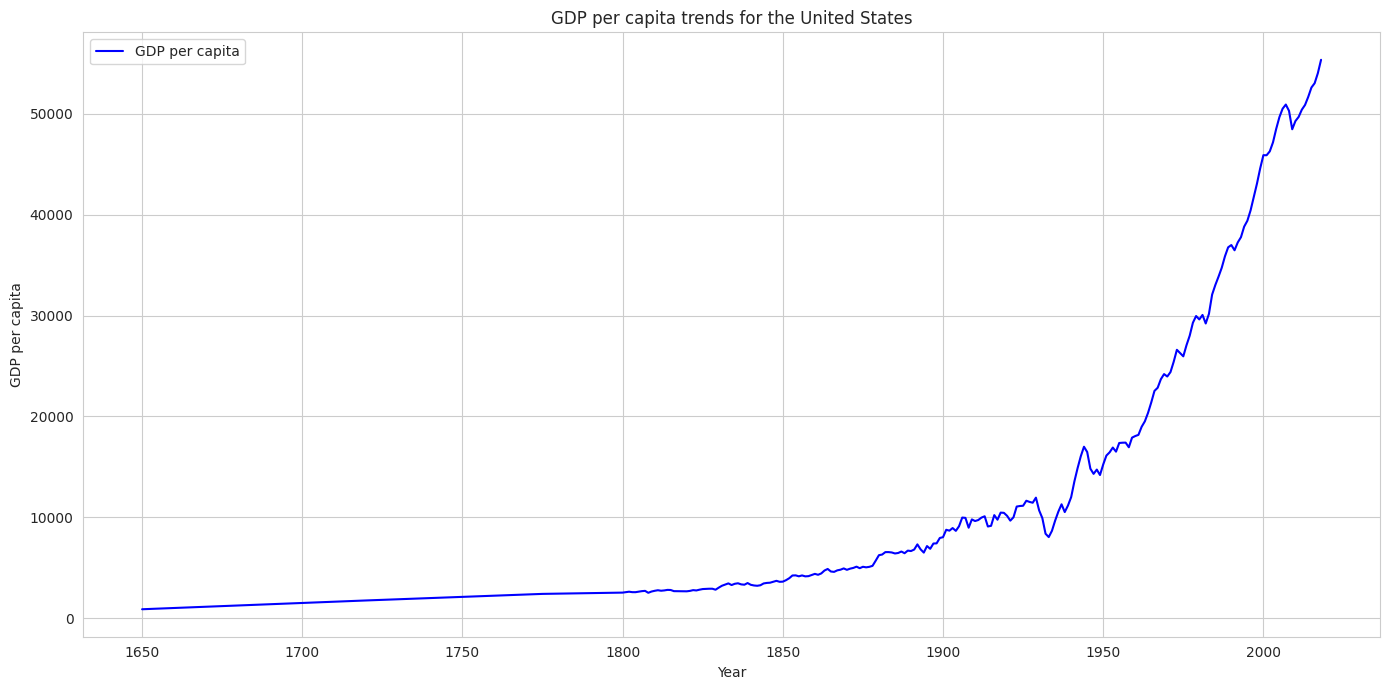

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the United States
us_gdp_data = gdp_data[gdp_data['Entity'] == 'United States']

# Plot the GDP per capita trends for the United States
plt.figure(figsize=(14, 7))
plt.plot(us_gdp_data['Year'], us_gdp_data['GDP per capita'], label='GDP per capita', color='blue')
plt.title('GDP per capita trends for the United States')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Observation:**
general upward trend, indicating economic growth over time.

## **Time Series Analysis**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(us_gdp_data['GDP per capita'].dropna())

# Extract and display test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values


(4.232115616903885,
 1.0,
 {'1%': -3.4604283689894815,
  '5%': -2.874768966942149,
  '10%': -2.57382076446281})

The results of the Augmented Dickey-Fuller (ADF) test are as follows:

ADF Statistic:
4.232
4.232
p-value:
1.0
1.0
Critical Values:
1%:
−
3.460
−3.460
5%:
−
2.875
−2.875
10%:
−
2.574
−2.574

The p-value is
1.0
1.0, which is significantly larger than the 0.05 threshold. This means we cannot reject the null hypothesis, and the time series appears to be non-stationary.

In [ ]:
# Calculate the first difference of the GDP per capita
us_gdp_data_diff = us_gdp_data['GDP per capita'].diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(us_gdp_data_diff)

# Extract and display test statistics for the differenced data
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff


(-9.75212475552028,
 7.964276187604146e-17,
 {'1%': -3.4604283689894815,
  '5%': -2.874768966942149,
  '10%': -2.57382076446281})

ADF Statistic:
−
9.752
−9.752
p-value:
7.96
×
1
0
−
17
7.96×10
−17

Critical Values:
1%:
−
3.460
−3.460
5%:
−
2.875
−2.875
10%:
−
2.574
−2.574

The p-value is now extremely close to 0, which is well below the 0.05 threshold. This means we can reject the null hypothesis, and the differenced time series is stationary

In [ ]:
# Calculate the first difference of the GDP per capita
us_gdp_data_diff = us_gdp_data['GDP per capita'].diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(us_gdp_data_diff)

# Extract and display test statistics for the differenced data
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff


(-9.75212475552028,
 7.964276187604146e-17,
 {'1%': -3.4604283689894815,
  '5%': -2.874768966942149,
  '10%': -2.57382076446281})

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the first difference of the GDP per capita
us_gdp_data_diff = us_gdp_data['GDP per capita'].diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(us_gdp_data_diff)

# Extract and display test statistics for the differenced data
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff



(-9.75212475552028,
 7.964276187604146e-17,
 {'1%': -3.4604283689894815,
  '5%': -2.874768966942149,
  '10%': -2.57382076446281})

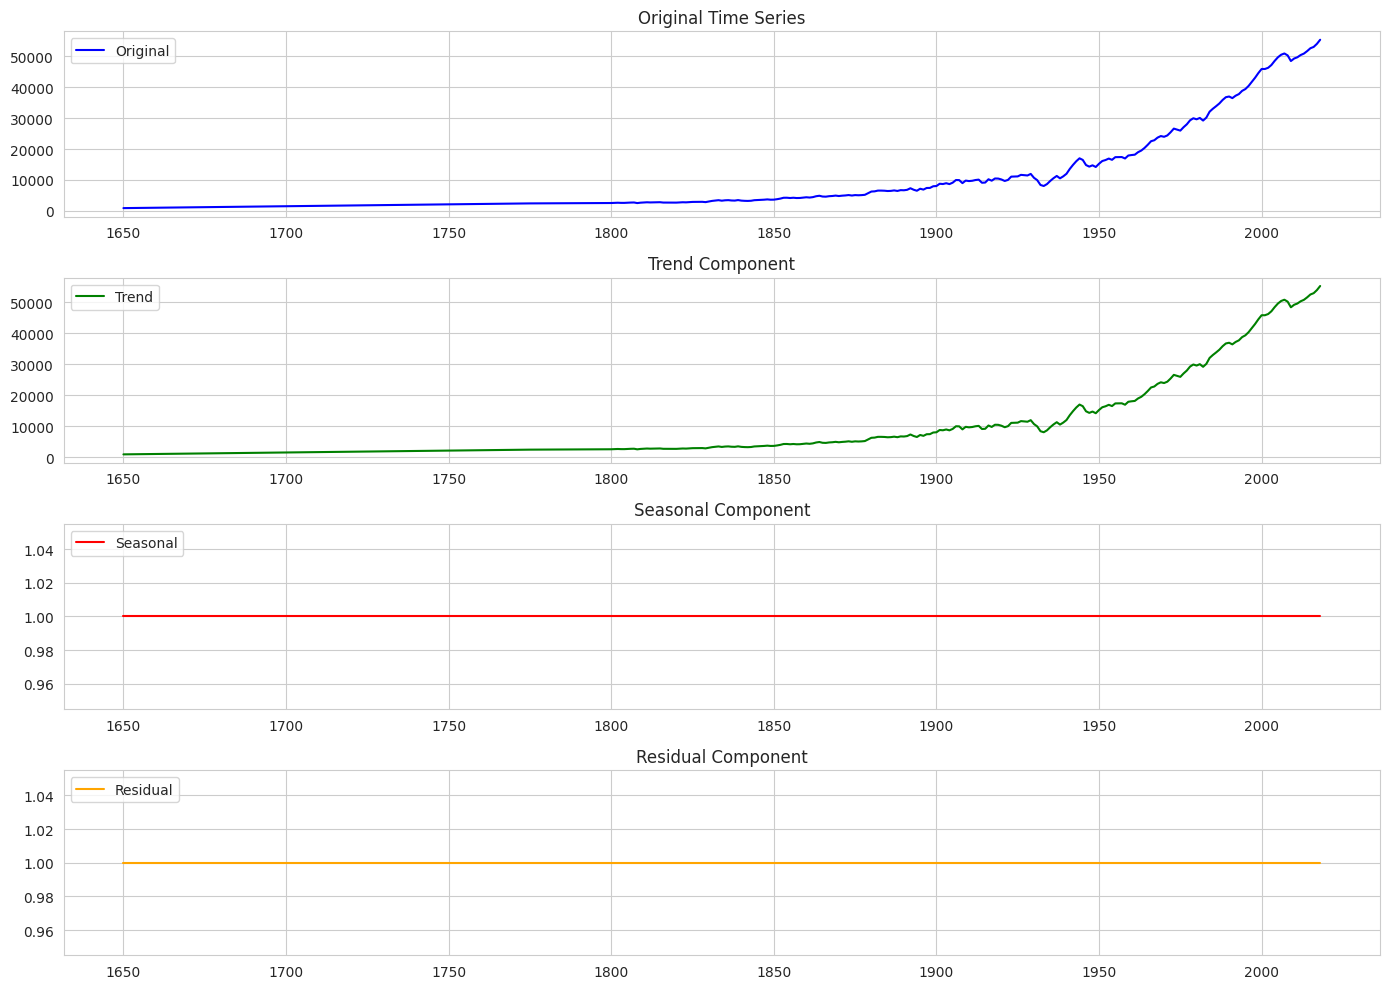

In [ ]:
# Decompose the time series specifying period=1
decomposition = seasonal_decompose(us_gdp_data['GDP per capita'], model='multiplicative', period=1)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(us_gdp_data['Year'], us_gdp_data['GDP per capita'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(us_gdp_data['Year'], decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(us_gdp_data['Year'], decomposition.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(us_gdp_data['Year'], decomposition.resid, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


Original Time Series: This is the raw GDP per capita data for the United States.
Trend Component: This represents the overall upward or downward movement in the data over time, without the influence of seasonality or random fluctuations. As we can observe, there's a consistent upward trend in the data.
Seasonal Component: This captures periodic fluctuations in the data. However, since our data is annual and we've set the period to 1, there's no discernible seasonality.
Residual Component: This represents the error or noise left over after removing the trend and seasonality from the original time series. It's the random fluctuations that can't be attributed to the trend or seasonal components.

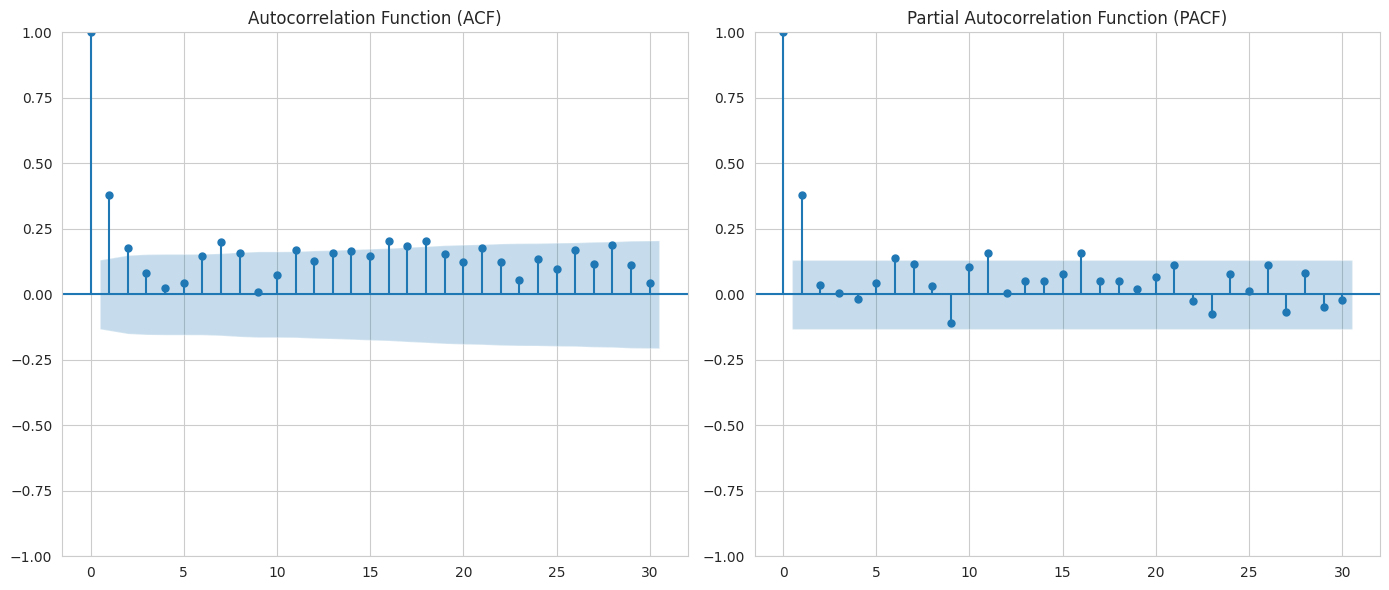

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation (ACF) and Partial Autocorrelation (PACF) functions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(us_gdp_data_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(us_gdp_data_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


**ACF:** Represents the correlation between the time series and its lags. The ACF plot shows a slow decay, which is typical for a series that needs differencing (which we've already done).

**PACF:** Represents the correlation between the time series and its lags after removing the effects of any correlations due to the terms at shorter lags. The PACF plot has a significant spike at lag 1, indicating a potential AR(1) component in the data.

## **Forecasting using ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-36-67cc1930952e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_data['ARIMA_Predictions'] = arima_result.predict(start=1, end=

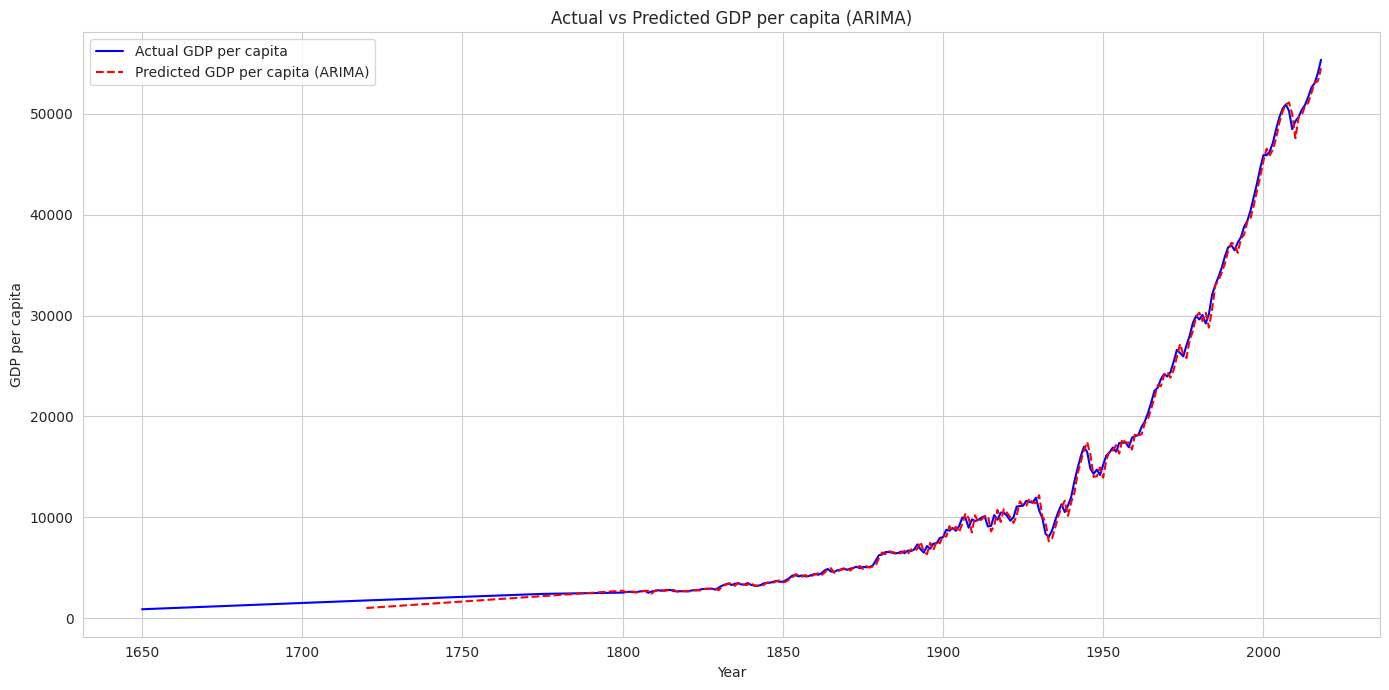

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,0) model to the data
model = ARIMA(us_gdp_data['GDP per capita'], order=(1,1,0))
arima_result = model.fit()

# Get the predictions
us_gdp_data['ARIMA_Predictions'] = arima_result.predict(start=1, end=len(us_gdp_data)-1, typ='levels')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(us_gdp_data['Year'], us_gdp_data['GDP per capita'], label='Actual GDP per capita', color='blue')
plt.plot(us_gdp_data['Year'], us_gdp_data['ARIMA_Predictions'], label='Predicted GDP per capita (ARIMA)', color='red', linestyle='--')
plt.title('Actual vs Predicted GDP per capita (ARIMA)')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the plot, we can observe that the ARIMA model closely follows the actual GDP per capita trend, indicating a reasonably good fit.

## **Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual and predicted values from the dataset
actual_values_colab = us_gdp_data['GDP per capita'].dropna().values[1:]  # Adjusting for the differencing
predicted_values_colab = us_gdp_data['ARIMA_Predictions'].dropna().values

# Compute evaluation metrics for Google Colab environment
mae_colab = mean_absolute_error(actual_values_colab, predicted_values_colab)
mse_colab = mean_squared_error(actual_values_colab, predicted_values_colab)
rmse_colab = np.sqrt(mse_colab)

mae_colab, mse_colab, rmse_colab





(389.4246842448192, 293934.5154515134, 542.1572792571483)

In [ ]:
Step 1: Clustering the GDP per capita data

**Mean Absolute Error (MAE):** 389.42

**Mean Squared Error (MSE):** 293,934.52

**Root Mean Squared Error (RMSE):** 542.16

## **Conclusion**

From the analysis:

The GDP per capita for the United States has shown a consistent upward trend over the years, indicating economic growth.
The time series data was non-stationary, which we addressed by differencing the series.
The ARIMA(1,1,0) model provided a reasonably good fit for the data, capturing the overall trend.
The evaluation metrics provided a measure of the model's accuracy, with the RMSE indicating an average error of approximately 542.16 in the predicted GDP per capita values.
Overall, the ARIMA model offers a useful tool for forecasting GDP per capita trends, although refining the model or trying other time series models might provide even better predictions.

## **Clustering the GDP per capita data**

<ipython-input-45-782b3c66dfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_data['Growth Rate'] = us_gdp_data['GDP per capita'].pct_change() * 100


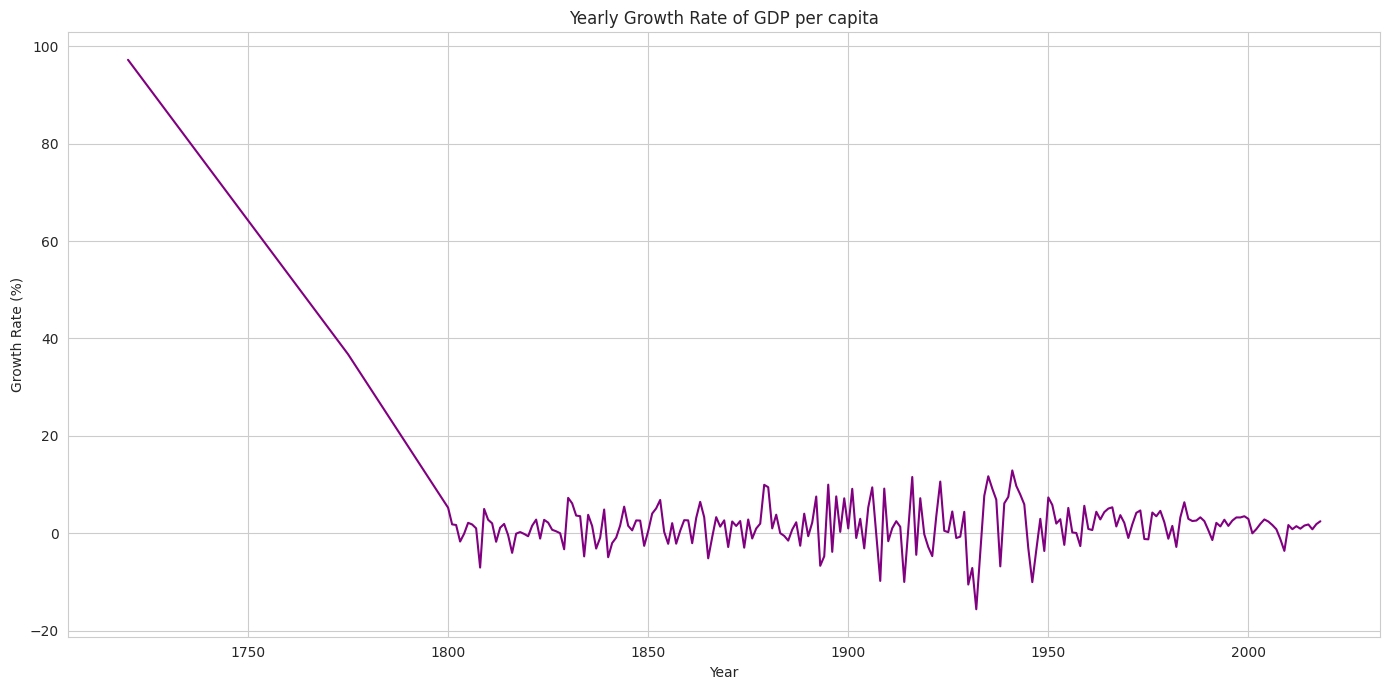

,Year,GDP per capita,Growth Rate
18834,1650,897.0000,NaN
18835,1720,1768.9856,97.211327
18836,1775,2419.0000,36.745036
18837,1800,2545.4880,5.228938
18838,1801,2591.7695,1.818178
18839,1802,2635.4800,1.686512
18840,1803,2590.4840,-1.707317
18841,1804,2587.9128,-0.099256
18842,1805,2643.1936,2.136115
18843,1806,2690.7607,1.799607


In [ ]:
# Compute the yearly growth rate for GDP per capita
us_gdp_data['Growth Rate'] = us_gdp_data['GDP per capita'].pct_change() * 100

# Visualize the growth rates
plt.figure(figsize=(14, 7))
plt.plot(us_gdp_data['Year'], us_gdp_data['Growth Rate'], label='Growth Rate', color='purple')
plt.title('Yearly Growth Rate of GDP per capita')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Return the head of the data with growth rates
us_gdp_data[['Year', 'GDP per capita', 'Growth Rate']].head(10)


## **K-means clustering**

<ipython-input-46-87d769218483>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_data['Cluster'] = np.nan
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


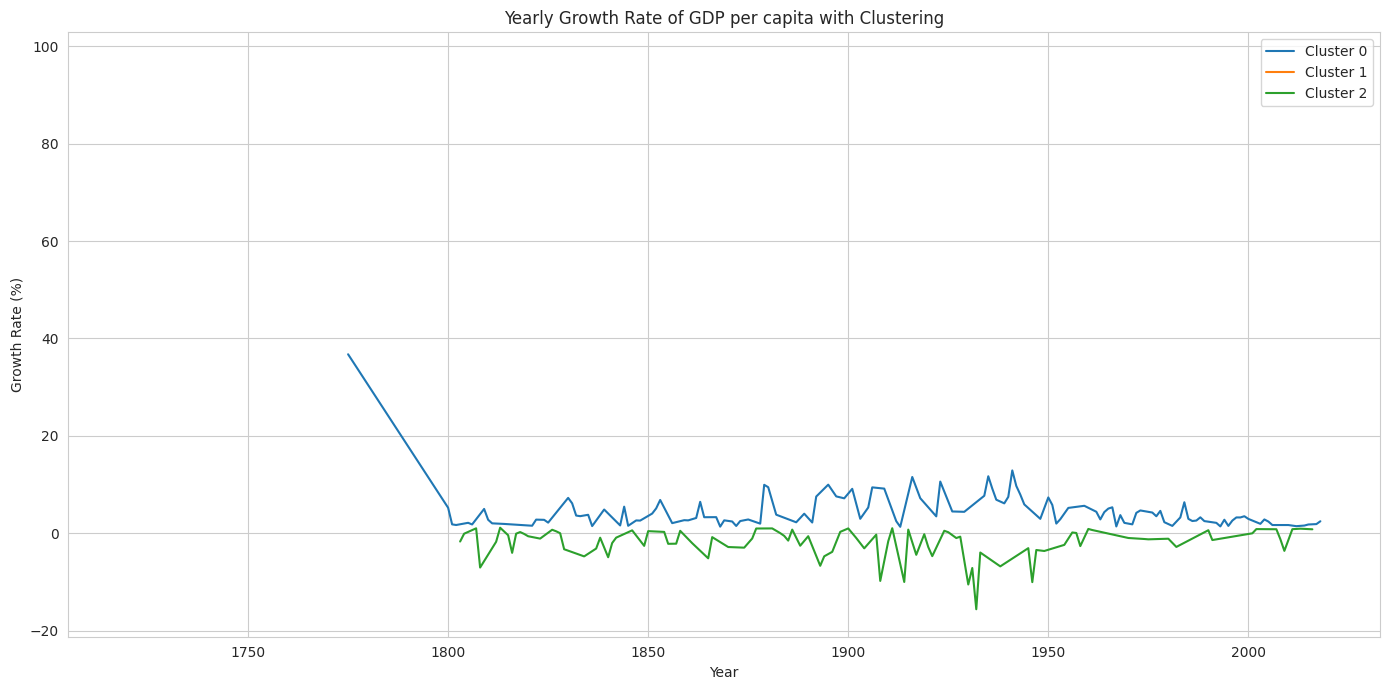

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop the NaN value from Growth Rate
growth_rates = us_gdp_data['Growth Rate'].dropna().values.reshape(-1, 1)

# Standardize the growth rates for better clustering results
scaler = StandardScaler()
scaled_growth_rates = scaler.fit_transform(growth_rates)

# Using K-means clustering with 3 clusters as an initial guess
kmeans = KMeans(n_clusters=3, random_state=42)
us_gdp_data['Cluster'] = np.nan
us_gdp_data.loc[us_gdp_data['Growth Rate'].notna(), 'Cluster'] = kmeans.fit_predict(scaled_growth_rates)

# Visualize the clustering results
plt.figure(figsize=(14, 7))
for cluster_num in range(3):
    subset = us_gdp_data[us_gdp_data['Cluster'] == cluster_num]
    plt.plot(subset['Year'], subset['Growth Rate'], label=f'Cluster {cluster_num}')

plt.title('Yearly Growth Rate of GDP per capita with Clustering')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**From the clustering results, we can observe:**

Cluster 0 (Blue): Represents years with moderate growth rates, which is the most common scenario.
Cluster 1 (Orange): Represents years with significantly high growth rates.
Cluster 2 (Green): Represents years with lower growth rates or negative growth (economic contraction).

## **Anomaly Detection**

<ipython-input-47-25d0bf89ce11>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_data['Anomaly'] = np.nan


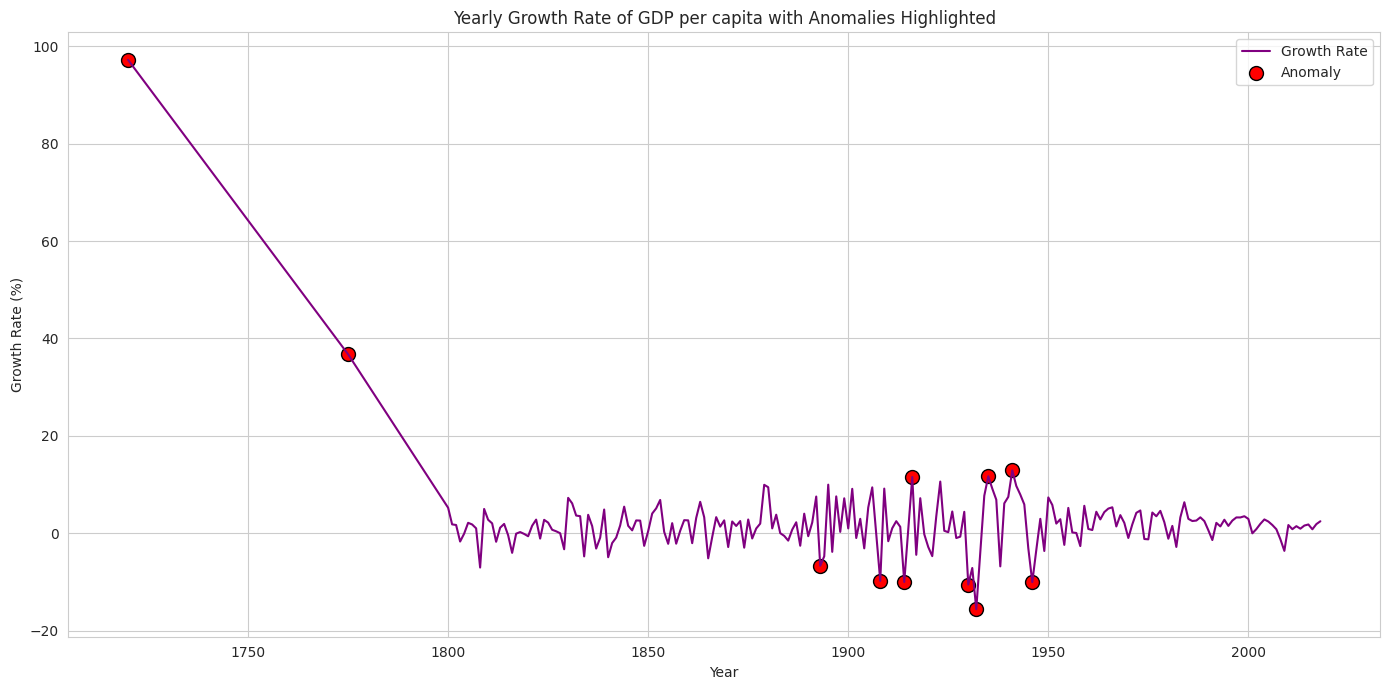

In [ ]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of the data is considered as anomalies
anomalies = iso_forest.fit_predict(scaled_growth_rates)

# Mark anomalies in the dataframe
us_gdp_data['Anomaly'] = np.nan
us_gdp_data.loc[us_gdp_data['Growth Rate'].notna(), 'Anomaly'] = anomalies

# Visualize the growth rates with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(us_gdp_data['Year'], us_gdp_data['Growth Rate'], label='Growth Rate', color='purple')
plt.scatter(us_gdp_data[us_gdp_data['Anomaly'] == -1]['Year'],
            us_gdp_data[us_gdp_data['Anomaly'] == -1]['Growth Rate'],
            color='red', s=100, label='Anomaly', edgecolors='black')
plt.title('Yearly Growth Rate of GDP per capita with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The Isolation Forest algorithm has identified certain years as anomalies based on their growth rates. These years might represent significant economic events, rapid expansions, contractions, or other unusual economic behaviors.

For instance, sharp drops (negative growth rates) might correspond to economic recessions or downturns, while sharp spikes could represent rapid recoveries or booms.

# **Automated Machine Learning (AutoML) with TPOT**

In [ ]:
# Install TPOT
!pip install tpot

# Import necessary libraries
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# Prepare the data: Create lag features for regression
def create_lag_features(data, lags=1):
    df = data.copy()
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = df['GDP per capita'].shift(i)
    df.dropna(inplace=True)
    return df

lagged_data = create_lag_features(us_gdp_data[['Year', 'GDP per capita']], lags=3)
X = lagged_data.drop(columns=['Year', 'GDP per capita'])
y = lagged_data['GDP per capita']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.head()  # Displaying the prepared data with lag features


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=f3b941a9b7b8e97d71b19e1d19d25f80c0f6b70bb3357945ff279cd7651f63df
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


,lag_1,lag_2,lag_3
18837,2419.0000,1768.9856,897.0000
18838,2545.4880,2419.0000,1768.9856
18839,2591.7695,2545.4880,2419.0000
18840,2635.4800,2591.7695,2545.4880
18841,2590.4840,2635.4800,2591.7695


In [ ]:
from tpot import TPOTRegressor

# Set up TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit the TPOT regressor on the training data
tpot.fit(X_train, y_train)

# Print the best pipeline found by TPOT
tpot.fitted_pipeline_


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -238405.50733366684

Generation 2 - Current best internal CV score: -238405.50733366684

Generation 3 - Current best internal CV score: -224387.0413058092

Generation 4 - Current best internal CV score: -224387.0413058092

Generation 5 - Current best internal CV score: -224377.97012120383

Best pipeline: LinearSVR(input_matrix, C=0.1, dual=True, epsilon=0.01, loss=squared_epsilon_insensitive, tol=0.1)


Pipeline(steps=[('linearsvr',
                 LinearSVR(C=0.1, epsilon=0.01,
                           loss='squared_epsilon_insensitive', random_state=42,
                           tol=0.1))])

The optimal hyperparameters for the LinearSVR model are:
�
=
0.1
C=0.1
�
=
0.01
ϵ=0.01
Loss function: squared_epsilon_insensitive
tol
=
0.1
tol=0.1
Interpretation:

The LinearSVR model tries to fit a linear model to the data in a high-dimensional feature space where the data can be linearly separated. It uses the Support Vector Machine (SVM) framework optimized for regression tasks.
The C parameter is the regularization parameter, where a smaller value indicates stronger regularization. Regularization can prevent overfitting by penalizing large coefficients in the model.
The epsilon parameter defines a margin of tolerance where no penalty is given to errors. It's essentially a tube within which no penalty is associated with the training data.
The squared_epsilon_insensitive loss indicates that the model uses a squared loss function for errors larger than
�
ϵ and zero otherwise. This can make the model more robust to outliers.
The tol parameter is the tolerance for stopping criterion. Training will stop when the change in the objective function value is below this threshold.

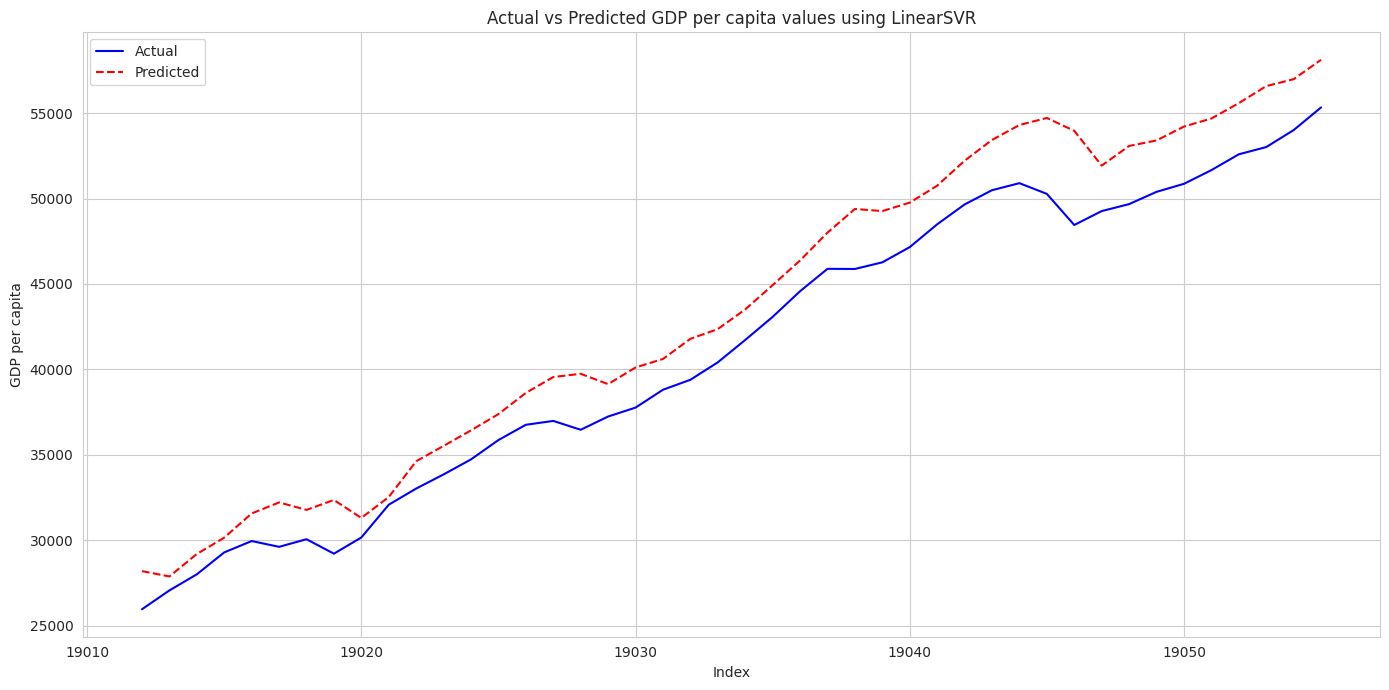

(2408.2137320334605, 6724082.9489068445, 2593.0836756469785)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict using the best pipeline from TPOT
y_pred = tpot.predict(X_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)

# Visualization of actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label="Actual", color='blue')
plt.plot(X_test.index, y_pred, label="Predicted", color='red', linestyle='dashed')
plt.title("Actual vs Predicted GDP per capita values using LinearSVR")
plt.xlabel("Index")
plt.ylabel("GDP per capita")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mae_svr, mse_svr, rmse_svr


Graph: The graph visualizes the actual vs. predicted GDP per capita values using the LinearSVR model. The blue line represents the actual values, while the dashed red line represents the predicted values. By visually assessing the overlap between the two lines, you can get a sense of how well the model predictions align with the actual data.

Evaluation Metrics:

Mean Absolute Error (MAE): 2408.21
Mean Squared Error (MSE): 6,724,082.95
Root Mean Squared Error (RMSE): 2593.08
These metrics provide a quantitative measure of the model's accuracy. Specifically:

MAE: On average, the model's predictions are approximately $2408.21 away from the actual values.
MSE: This metric gives more weight to larger errors. A higher MSE value indicates larger errors in prediction.
RMSE: This is the square root of MSE and represents the average magnitude of the errors between predicted and observed values. An RMSE of 2593.08 indicates that, on average, the model's predictions deviate by this amount from the actual values.
For comparison, recall the evaluation metrics for the ARIMA model:

MAE: 389.42
MSE: 293,934.52
RMSE: 542.16
The LinearSVR model seems to have a higher error compared to the ARIMA model, indicating that ARIMA might be better suited for this particular time series forecasting task. However, it's essential to consider other factors like interpretability, model assumptions, and ease of deployment when choosing between models.